In [58]:
# Utility
import math

def abs_vec(vec: list[float]) -> float:
    return math.sqrt(vec[0]**2 + vec[1]**2)

def norm_vec(vec: list[float]) -> list[float]:
    a: float = abs_vec(vec)
    return [vec[0] / a, vec[1] / a]

def mult_vec_scal(vec: list[float], mult: float) -> list[float]:
    return [vec[0] * mult, vec[1] * mult]

def add_vec(vec1: list[float], vec2: list[float]) -> list[float]:
    return [vec1[0] + vec2[0], vec1[1] + vec2[1]]


In [59]:
# KASTRÖRELSE

mass: float = 0.1 # kg
air_density: float = 1.3 # kg/m^3
diameter: float = 0.3 # m
drag_coeff: float = 0.47
k: float = 1/2 * air_density * drag_coeff * (diameter/2)**2 * math.pi
g: float = 9.82 # m/s^2

def a_calc(v: list[float], p: list[float]) -> list[float]:
    return add_vec(mult_vec_scal(norm_vec(v), -k * abs_vec(v)**2), [0,-g])

In [60]:
# LOGIK

dts: list[float] = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001] # s
t: float = 0

p_0: list[float] = [0,0]
v_0: list[float] = [100, 100]

p: list[float] = p_0
v: list[float] = v_0

p_lists: list[list[list[float]]] = []

for dt in dts:
    p_list: list[list[float]] = []
    p = p_0
    v = v_0
    t = 0
    p_list.append(p)
    while t < 10:
        a: list[float] = a_calc(v, p)
        v = add_vec(v, mult_vec_scal(a, dt))
        p = add_vec(p, mult_vec_scal(v, dt))

        p_list.append(p)

        t += dt
    p_lists.append(p_list)

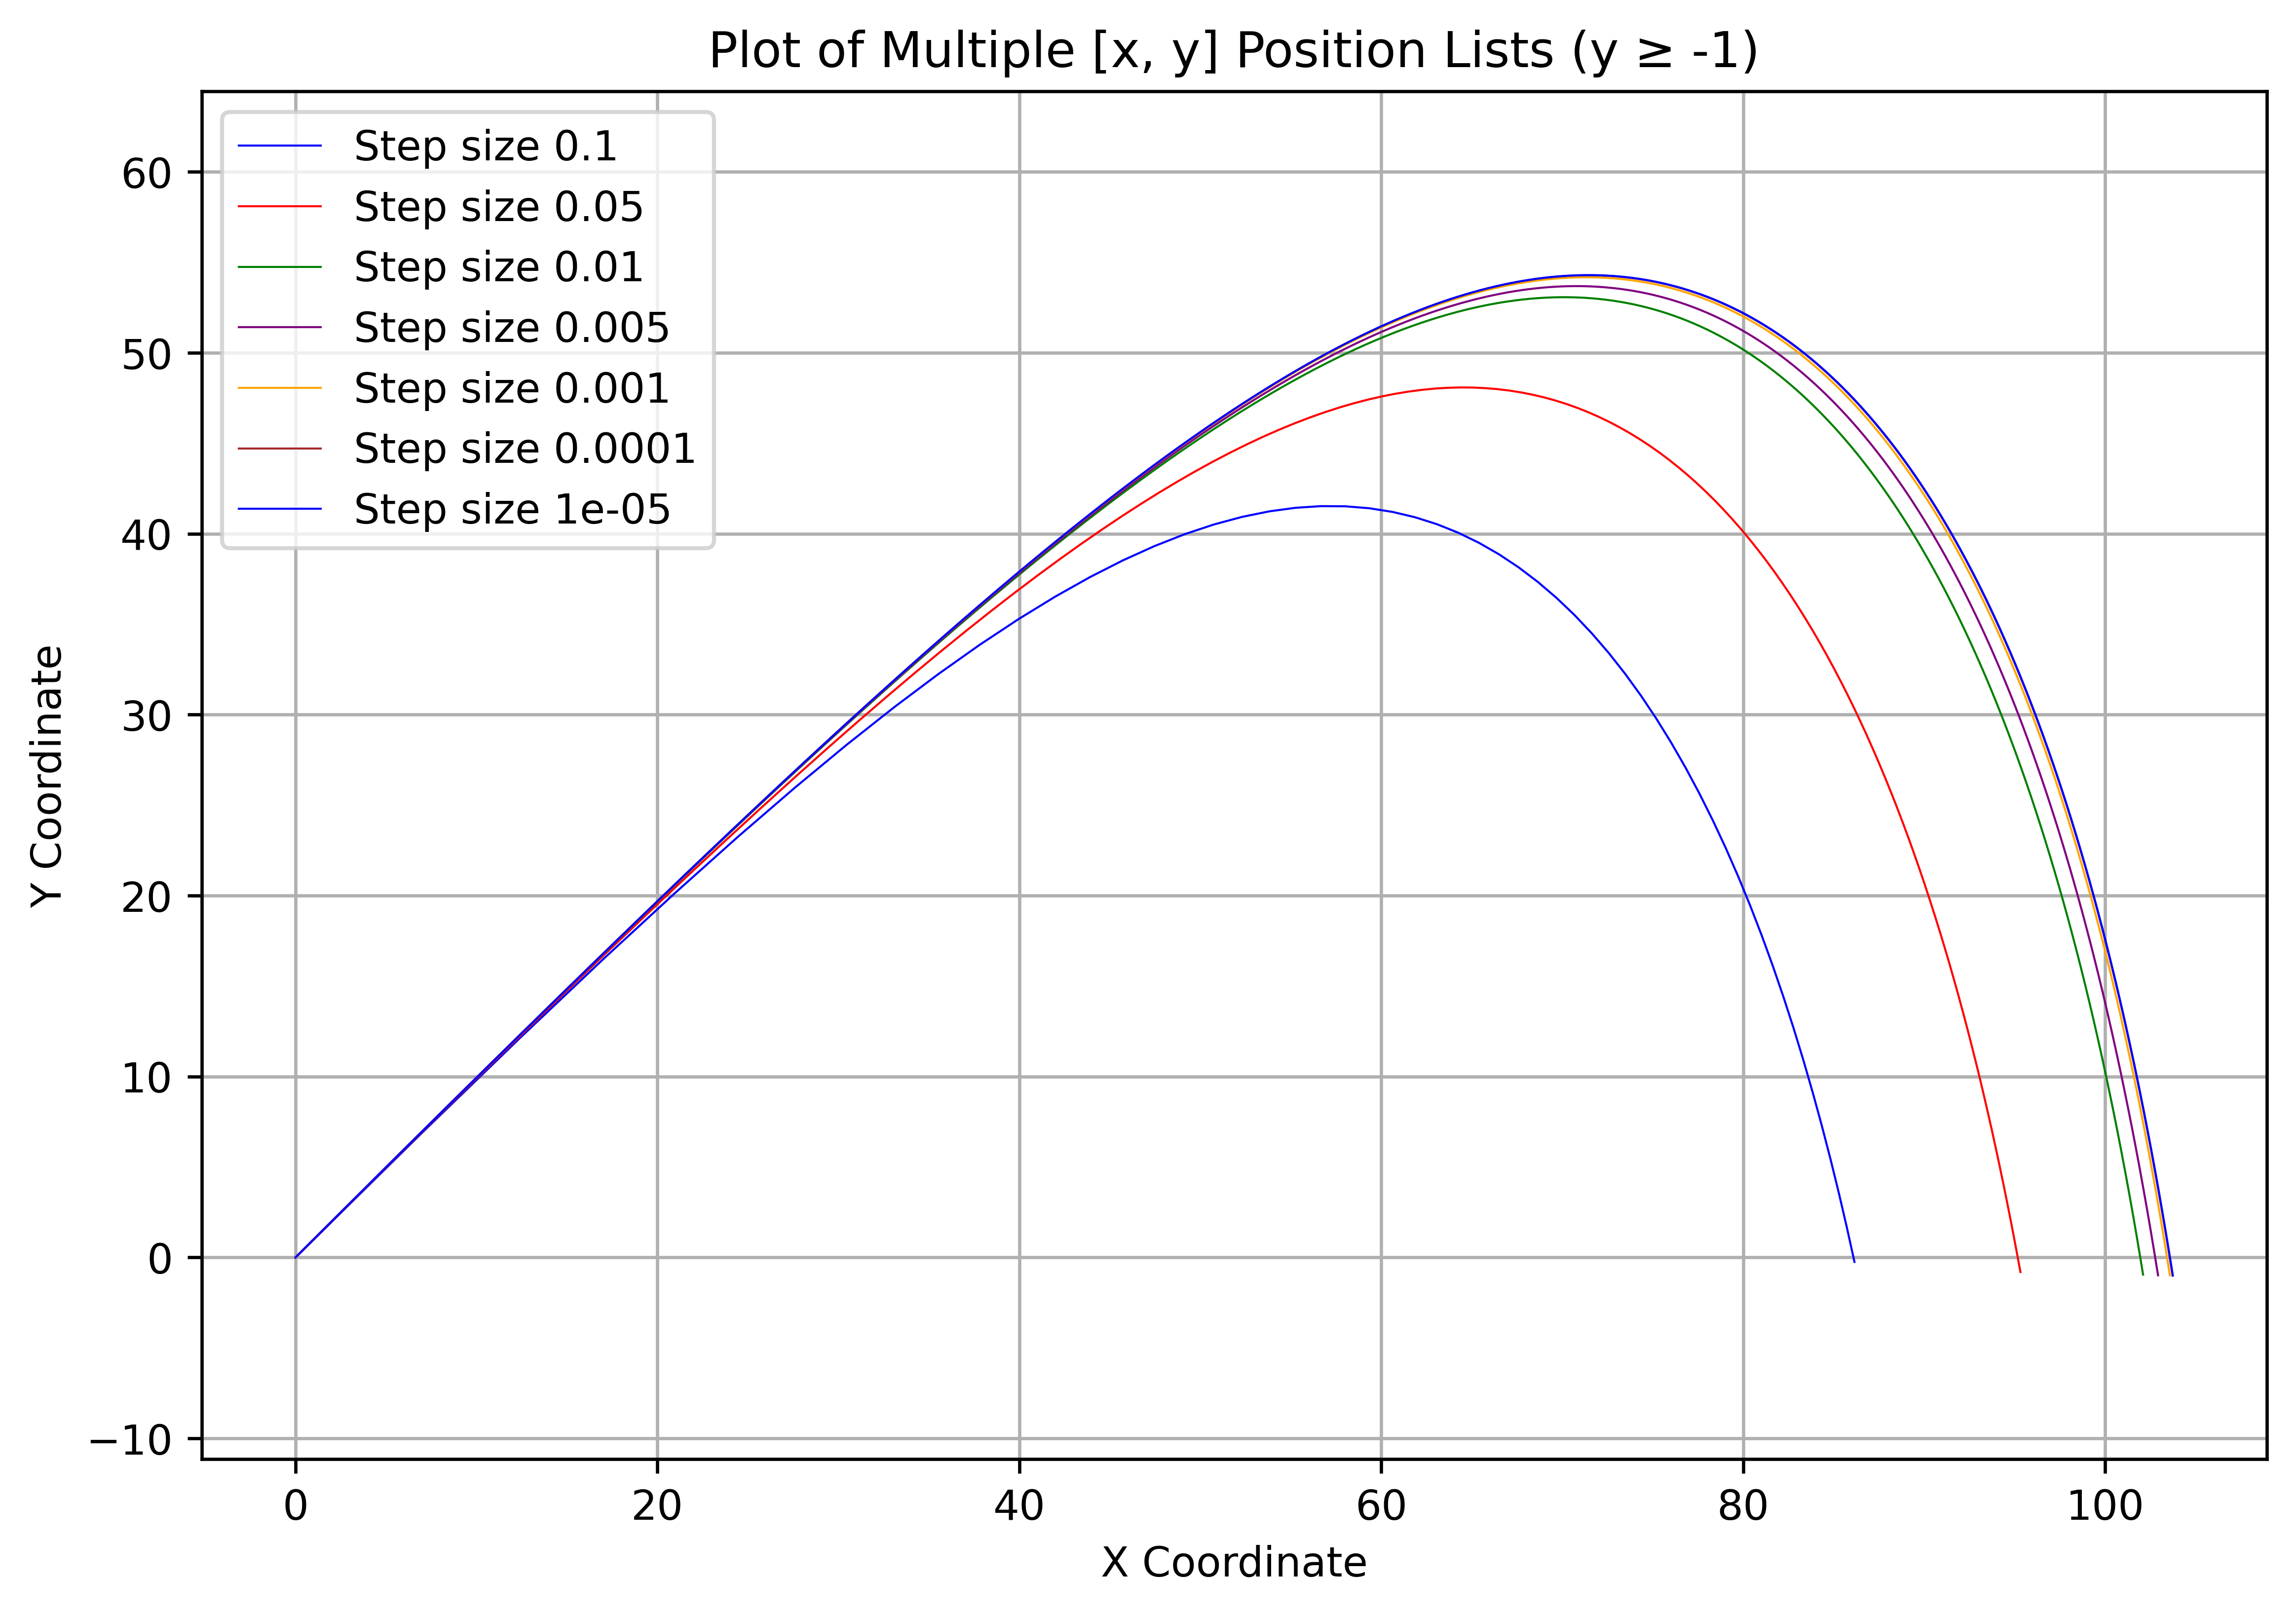

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(9, 6), dpi=600)

# Define colors and markers for better visibility
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

# Iterate over each list of points and plot them
for i, p_list in enumerate(p_lists):
    p_ndarray = np.array(p_list)  # Convert to NumPy array
    
    # Apply y cutoff
    filtered_points = p_ndarray[p_ndarray[:, 1] >= -1]  # Keep only points where y >= -1
    
    if filtered_points.size == 0:  # Skip empty lists after filtering
        continue
    
    x_coords, y_coords = filtered_points[:, 0], filtered_points[:, 1]  # Extract x and y
    
    color = colors[i % len(colors)]  # Cycle through colors
    marker = markers[i % len(markers)]  # Cycle through markers
    
    plt.plot(x_coords, y_coords, linestyle='-', color=color, linewidth=0.5, label=f"Step size {dts[i]}")

# Labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Plot of Multiple [x, y] Position Lists (y ≥ -1)")
plt.legend()
plt.grid(True)
plt.axis("equal")  


# Show the plot
plt.show()
